In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [50]:
#importation des données 
df = pd.read_csv("data/users.csv")

In [51]:
df.isnull().sum().sum()


1211192

NaN values in the dataset. 2 options : delete row with NaN values or remplace NaN value by mean. 

In [55]:
#Delete NaN values 
#df_clean = df.dropna()
df_filled = df.fillna(df.mean(numeric_only=True))


In [57]:
#Centrer Réduire les données 
sc = StandardScaler()
users_cr = sc.fit_transform(df_filled.values)

In [59]:
#Réalisation de l'ACP
pca = PCA()
principal_components = pca.fit_transform(users_cr)
n = (pca.n_components_)
print(n)

13


    Val.Propre    Seuils
0     4.584073  3.180134
1     1.248715  2.180134
2     1.038706  1.680134
3     1.002980  1.346800
4     1.000118  1.096800
5     0.985701  0.896800
6     0.952081  0.730134
7     0.903204  0.587277
8     0.673539  0.462277
9     0.431538  0.351166
10    0.089886  0.251166
11    0.059421  0.160256
12    0.030045  0.076923


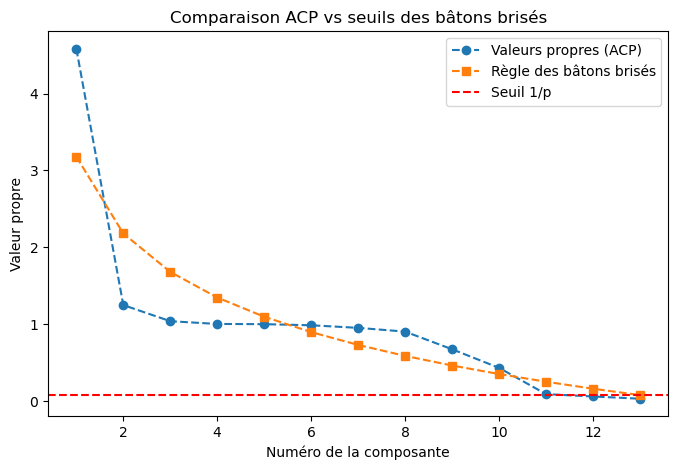

In [61]:
# Extraction des valeurs propres
valeurs_propres = pca.explained_variance_
n = len(valeurs_propres)  # Nombre de variables initiales

# 🔹 Calcul des seuils de la règle des bâtons brisés
bk = 1 / np.arange(n, 0, -1)  # Génération de la série inverse (1/n, 1/(n-1), ..., 1/1)
bk = np.cumsum(bk)  # Somme cumulative
bk = bk[::-1]  # Inversion pour correspondre à l'ordre décroissant des valeurs propres

# 🔍 Comparaison entre valeurs propres et seuils
print(pd.DataFrame({'Val.Propre': valeurs_propres, 'Seuils': bk}))

# Affichage des valeurs propres et des valeurs de la règle des bâtons brisés
plt.figure(figsize=(8,5))
plt.plot(range(1, n+1), valeurs_propres, marker='o', linestyle='--', label="Valeurs propres (ACP)")
plt.plot(range(1, n+1), bk, marker='s', linestyle='--', label="Règle des bâtons brisés")
plt.axhline(y=1/n, color='r', linestyle='dashed', label="Seuil 1/p")  # Seuil d'égalité
plt.xlabel("Numéro de la composante")
plt.ylabel("Valeur propre")
plt.title("Comparaison ACP vs seuils des bâtons brisés")
plt.legend()
plt.show()

Use 3 eig for the ACP according to 

In [64]:
# Récupérer les valeurs propres / variance / inertie
# Valeurs propres (Variance des composantes principales)

eig = pca.explained_variance_
print("Valeurs propres:", eig)
eig
#valeurs_propres = Variance estimé avec n-1 degrés de liberté
# La variance est estimée avec n-1 degrés de liberté

# Variance expliquée par chaque composante (ratio)
var_explain = pca.explained_variance_ratio_
print("Variance expliquée (ratio) :", var_explain)

Valeurs propres: [4.58407313 1.24871484 1.03870644 1.00297982 1.00011767 0.98570148
 0.95208054 0.90320375 0.67353902 0.43153817 0.08988609 0.05942149
 0.03004461]
Variance expliquée (ratio) : [0.35262082 0.09605494 0.07990045 0.07715225 0.07693209 0.07582315
 0.07323692 0.06947717 0.05181067 0.03319523 0.00691431 0.00457088
 0.00231112]


In [66]:
# Un ajustement est nécessaire pour avoir la variance avec n degrés de liberté
eigval=eig*(len(users_cr)-1)/len(users_cr)
print(eigval)

[4.58407065 1.24871417 1.03870588 1.00297928 1.00011713 0.98570094
 0.95208002 0.90320326 0.67353866 0.43153794 0.08988604 0.05942146
 0.03004459]


In [68]:
# Inertie de chaque axes 
np.set_printoptions(suppress=True)
print(pca.explained_variance_ratio_*100)

[35.26208191  9.60549359  7.99004522  7.71522521  7.69320867  7.58231495
  7.32369246  6.94771736  5.18106658  3.31952258  0.69143106  0.45708816
  0.23111226]


In [70]:
vp_mat=pca.components_.T
# On calcule la racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [72]:
# Corrélation des variables avec les axes
corvar = np.zeros((13,13))
for k in range(13):
     corvar[:,k] = vp_mat[:,k] * sqrt_eigval[k]

# Afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.0058412   0.02587369  0.6342507  -0.32052485  0.01326267  0.55807795
   0.41918472 -0.06340241  0.05146325 -0.01655213  0.00084228 -0.0006792
  -0.00031958]
 [ 0.96566146 -0.08133897 -0.0050942  -0.00039615  0.00311848  0.00336087
   0.00776002  0.01364573 -0.02314966  0.07902703  0.18309814 -0.12865115
  -0.06108306]
 [ 0.28475512  0.50373119 -0.08833766 -0.07744702 -0.00569685 -0.1500961
   0.36312325  0.67619466 -0.16606911 -0.09973327 -0.03231917 -0.03071693
   0.0139674 ]
 [ 0.72486319 -0.13937506  0.10057577  0.06377953 -0.0215239  -0.02518057
  -0.15788428  0.11157919  0.52103629 -0.34683435 -0.09523096 -0.03707063
  -0.01654939]
 [ 0.81900551 -0.47582565  0.04406303  0.00918357  0.01642305  0.0563503
  -0.05918507  0.01979909 -0.27124427 -0.05048805 -0.01552506 -0.03807996
   0.12506192]
 [ 0.02880708  0.09481652 -0.39925892  0.52435813 -0.05575708  0.73601787
  -0.00077499  0.10403541  0.00943893 -0.00856593 -0.00170941 -0.00035218
   0.00045827]
 [ 0.8489661  -0.36706412

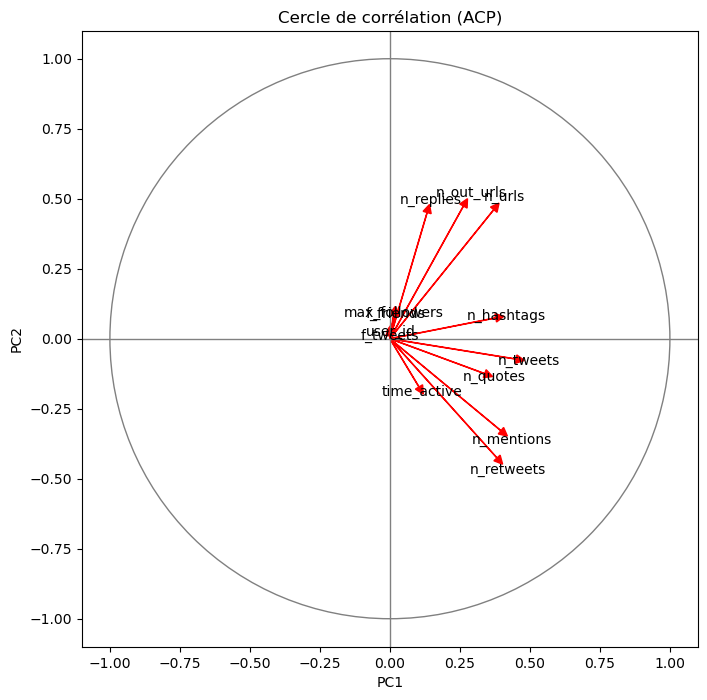

In [74]:
# On prend les 3 premières composantes
pcs = pca.components_[:3, :]
features = df_filled.columns

plt.figure(figsize=(8, 8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Cercle
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
plt.gca().add_patch(circle)

# Flèches pour chaque variable
for i, feature in enumerate(features):
    x = pcs[0, i]
    y = pcs[1, i]
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, fc='red', ec='red')
    plt.text(x * 1.1, y * 1.1, feature, color='black', ha='center', va='center')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cercle de corrélation (ACP)")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.gca().set_aspect('equal')
plt.show()


Good representation : n_retweets, n_mentions, n_quotes, n_tweets, n_hashtags, out_urls (near to border)
Bad representation : ser_id, max_followers, f_tweets, time_active

Correlation : n_mentions and n_retweets -> positively correlated and correlated woth axis 1
n_replies, out_urls, n_url -> positively correlated and correlated with axis 2 
n_replies and n_retweets -> decorrelated

In [77]:
# Cos² = carrés des coordonnées des variables projetées sur les axes
cos2 = pcs**2
cos2_df = pd.DataFrame(cos2.T, index=features, columns=['cos2_PC1', 'cos2_PC2', 'cos2_PC3'])
print(cos2_df)


                   cos2_PC1  cos2_PC2  cos2_PC3
user_id        7.443091e-06  0.000536  0.387284
n_tweets       2.034223e-01  0.005298  0.000025
n_replies      1.768853e-02  0.203205  0.007513
n_quotes       1.146201e-01  0.015556  0.009739
n_retweets     1.463263e-01  0.181315  0.001869
max_followers  1.810286e-04  0.007200  0.153468
n_mentions     1.572278e-01  0.107900  0.000682
n_hashtags     1.428704e-01  0.005539  0.000985
n_urls         1.376086e-01  0.212459  0.000032
n_out_urls     6.895746e-02  0.224520  0.001835
f_tweets       1.018008e-07  0.000116  0.037026
f_friends      2.894770e-04  0.006682  0.180596
time_active    1.080042e-02  0.029675  0.218946


If a var is near to 1, they have a good representation. 

In [80]:
# Contribution (%) des variables à chaque axe
contrib = pcs**2
contrib = contrib / contrib.sum(axis=1)[:, np.newaxis]  # Normalisation
contrib = contrib * 100

# Générer dynamiquement les noms de colonnes en fonction du nombre de composantes
n_comp = contrib.shape[0]
col_names = [f'contrib_PC{i+1}' for i in range(n_comp)]

# Créer le DataFrame correctement
contrib_df = pd.DataFrame(contrib.T, index=features, columns=col_names)
print(contrib_df)

               contrib_PC1  contrib_PC2  contrib_PC3
user_id           0.000744     0.053611    38.728379
n_tweets         20.342227     0.529827     0.002498
n_replies         1.768853    20.320512     0.751275
n_quotes         11.462010     1.555633     0.973855
n_retweets       14.632628    18.131455     0.186920
max_followers     0.018103     0.719954    15.346759
n_mentions       15.722782    10.789985     0.068207
n_hashtags       14.287043     0.553948     0.098516
n_urls           13.760863    21.245880     0.003220
n_out_urls        6.895746    22.451950     0.183481
f_tweets          0.000010     0.011557     3.702632
f_friends         0.028948     0.668181    18.059632
time_active       1.080042     2.967507    21.894626


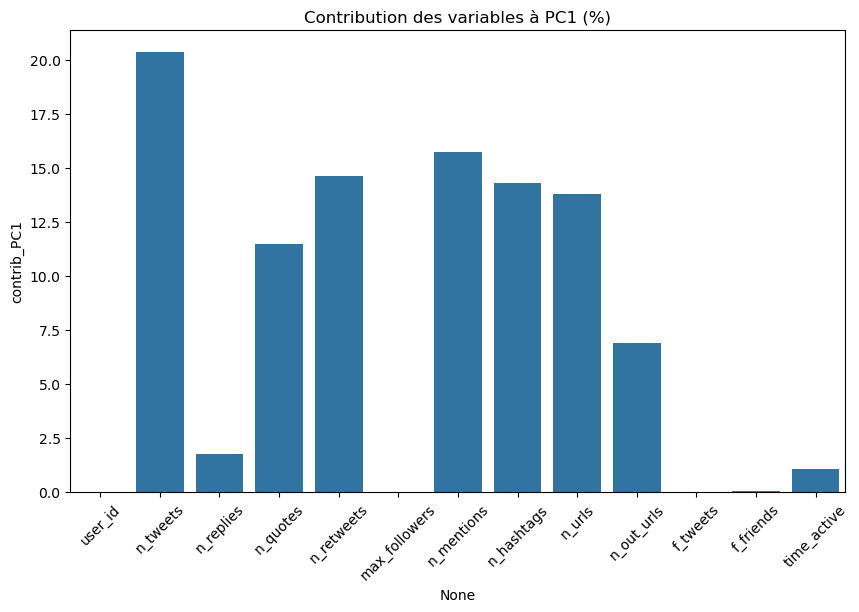

In [82]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=contrib_df.index, y=contrib_df['contrib_PC1'])
plt.xticks(rotation=45)
plt.title("Contribution des variables à PC1 (%)")
plt.show()